In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data1 = pd.read_csv('../output_data/county_metrics')
data2 = pd.read_csv('../output_data/UShospitals.csv')
data3 = pd.read_csv('../output_data/political.csv')
data4 =pd.read_csv('Resources/countycenter.csv')
covid_data = pd.DataFrame(data1)
hospitals =pd.DataFrame(data2)
politics = pd.DataFrame(data3)
population = pd.DataFrame(data4)

In [4]:
covid_data=covid_data.rename(columns={'ID':'fips'})
del covid_data['Unnamed: 0']
covid_data.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,fips
0,Iowa,Louisa,1,1,149,0.467223,2.140306,0.928822,11,19115.0
1,Nebraska,Custer,3,2,19,0.462357,2.162831,0.994087,8,31041.0
2,West Virginia,Wayne,17,2,60,0.419596,2.383245,0.956164,5,54099.0
3,Kentucky,Whitley,1,2,5,0.384896,2.598101,0.990889,6,21235.0
4,Minnesota,Pine,3,2,6,0.361583,2.765615,0.948092,6,27115.0


In [5]:
del hospitals['Unnamed: 0']
del hospitals['County']
del hospitals['State']
hospitals.head()

,Average Rating,Hospitals,Emergency Services,County Beds,fips
0,2.902778,90.0,0.583333,15072.0,6037
1,3.100000,28.0,0.900000,3054.0,6059
2,2.400000,22.0,0.933333,3230.0,6071
3,4.000000,21.0,0.933333,4205.0,6073
4,2.437500,17.0,0.937500,987.0,6065


In [6]:
del politics['FIPS.1']
politics =politics.rename(columns={'FIPS':'fips'})
politics.head()

,fips,Year,R/D Spectrum
0,1001.0,2008,0.471645
1,1003.0,2008,0.531744
2,1005.0,2008,0.025785
3,1007.0,2008,0.428398
4,1009.0,2008,0.659665


In [7]:
df=pd.merge(covid_data,hospitals,on ='fips',how='left')
df = pd.merge(df,politics,on='fips',how='left')

In [8]:
df2 = df.loc[(df['R Squared']  >.9)&(df['County']!='Unknown')&(df['Current Total']>20)]
df2=df2.sort_values('Tau', ascending =False)
df2.head(10)

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,fips,Average Rating,Hospitals,Emergency Services,County Beds,Year,R/D Spectrum
2170,Colorado,Pitkin,18,13,49,0.056955,17.557570,0.977817,34,8097.0,NaN,1.0,NaN,NaN,2008.0,-0.381513
2129,Nebraska,Douglas,23,23,269,0.063770,15.681419,0.953927,57,31055.0,4.0,11.0,1.0,2232.0,2008.0,0.058429
2077,Mississippi,Lowndes,9,6,25,0.070928,14.098838,0.968598,24,28087.0,3.0,1.0,1.0,328.0,2008.0,0.103935
1913,New Hampshire,Belknap,4,4,24,0.088893,11.249437,0.920326,27,33001.0,3.0,1.0,1.0,143.0,2008.0,0.094898
1907,Wisconsin,Sheboygan,6,8,36,0.089240,11.205754,0.974732,32,55117.0,4.0,2.0,1.0,370.0,2008.0,0.096710
1906,Wisconsin,Columbia,9,10,25,0.089243,11.205374,0.959468,26,55021.0,3.0,2.0,1.0,98.0,2008.0,-0.054068
1883,Iowa,Allamakee,5,6,24,0.090948,10.995293,0.953020,30,19005.0,NaN,1.0,NaN,NaN,2008.0,0.025953
1817,New Hampshire,Grafton,2,3,45,0.096678,10.343563,0.935704,43,33009.0,3.8,5.0,1.0,496.0,2008.0,-0.166037
1806,Hawaii,Kauai,5,11,21,0.097105,10.298171,0.944851,31,15007.0,4.0,3.0,1.0,71.0,2008.0,-0.375128
1803,New Hampshire,Carroll,1,1,29,0.097313,10.276167,0.921498,29,33003.0,3.5,2.0,1.0,50.0,2008.0,0.032282


In [9]:
population['fips']=population['STATEFP']*1000+population['COUNTYFP']
population.head()

,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE,fips
0,1,1,Autauga,Alabama,54571,32.500389,-86.494165,1001
1,1,3,Baldwin,Alabama,182265,30.548923,-87.762381,1003
2,1,5,Barbour,Alabama,27457,31.844036,-85.310038,1005
3,1,7,Bibb,Alabama,22915,33.030921,-87.127659,1007
4,1,9,Blount,Alabama,57322,33.955243,-86.591491,1009


In [10]:
df3= pd.merge(df2,population,on='fips', how = 'left')
# df3=df3.loc[df3['State']=='North Carolina']
df3.head()
# *df3['Average Rating']

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,fips,...,County Beds,Year,R/D Spectrum,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE
0,Colorado,Pitkin,18,13,49,0.056955,17.557570,0.977817,34,8097.0,...,NaN,2008.0,-0.381513,8.0,97.0,Pitkin,Colorado,17148.0,39.232543,-106.907765
1,Nebraska,Douglas,23,23,269,0.063770,15.681419,0.953927,57,31055.0,...,2232.0,2008.0,0.058429,31.0,55.0,Douglas,Nebraska,517110.0,41.259910,-96.061471
2,Mississippi,Lowndes,9,6,25,0.070928,14.098838,0.968598,24,28087.0,...,328.0,2008.0,0.103935,28.0,87.0,Lowndes,Mississippi,59779.0,33.515351,-88.392697
3,New Hampshire,Belknap,4,4,24,0.088893,11.249437,0.920326,27,33001.0,...,143.0,2008.0,0.094898,33.0,1.0,Belknap,New Hampshire,60088.0,43.517400,-71.440590
4,Wisconsin,Sheboygan,6,8,36,0.089240,11.205754,0.974732,32,55117.0,...,370.0,2008.0,0.096710,55.0,117.0,Sheboygan,Wisconsin,115507.0,43.733217,-87.820251


In [11]:
del df3['STATEFP']
del df3['COUNTYFP']
del df3['COUNAME']
del df3['STNAME']
df3.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,fips,Average Rating,Hospitals,Emergency Services,County Beds,Year,R/D Spectrum,POPULATION,LATITUDE,LONGITUDE
0,Colorado,Pitkin,18,13,49,0.056955,17.557570,0.977817,34,8097.0,NaN,1.0,NaN,NaN,2008.0,-0.381513,17148.0,39.232543,-106.907765
1,Nebraska,Douglas,23,23,269,0.063770,15.681419,0.953927,57,31055.0,4.0,11.0,1.0,2232.0,2008.0,0.058429,517110.0,41.259910,-96.061471
2,Mississippi,Lowndes,9,6,25,0.070928,14.098838,0.968598,24,28087.0,3.0,1.0,1.0,328.0,2008.0,0.103935,59779.0,33.515351,-88.392697
3,New Hampshire,Belknap,4,4,24,0.088893,11.249437,0.920326,27,33001.0,3.0,1.0,1.0,143.0,2008.0,0.094898,60088.0,43.517400,-71.440590
4,Wisconsin,Sheboygan,6,8,36,0.089240,11.205754,0.974732,32,55117.0,4.0,2.0,1.0,370.0,2008.0,0.096710,115507.0,43.733217,-87.820251


In [12]:
df3['illness']= df3['County Beds']*df3['Average Rating']/df3['POPULATION']*100000
df3['Prediction']= df3['Ynot']*np.exp(df3['Days In']*df3['Inv Tau'])
df3['Variation'] = df3['Current Total']-df3['Prediction']
df3=df3.loc[(df3['Variation']>-1000)&(df3['State']=='North Carolina')]
df3.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,fips,...,Emergency Services,County Beds,Year,R/D Spectrum,POPULATION,LATITUDE,LONGITUDE,illness,Prediction,Variation
12,North Carolina,Harnett,4,4,49,0.100193,9.980763,0.964326,31,37085.0,...,1.0,108.0,2008.0,0.222408,114678.0,35.359863,-78.847096,376.706953,89.323932,-40.323932
24,North Carolina,Franklin,11,11,66,0.107682,9.286633,0.950749,25,37069.0,...,NaN,NaN,2008.0,0.067241,60619.0,36.047826,-78.340858,NaN,162.379571,-96.379571
29,North Carolina,Union,24,4,110,0.110748,9.029503,0.940135,23,37179.0,...,1.0,NaN,2008.0,0.328473,201292.0,35.013609,-80.619702,NaN,306.512770,-196.512770
55,North Carolina,Chatham,3,12,75,0.119776,8.348905,0.959170,39,37037.0,...,NaN,68.0,2008.0,-0.050950,63505.0,35.744124,-79.236572,NaN,320.500441,-245.500441
82,North Carolina,Craven,2,8,29,0.126346,7.914788,0.988263,31,37049.0,...,1.0,NaN,2008.0,0.199383,103505.0,35.066758,-77.038555,NaN,100.470711,-71.470711


-0.16893682265950694 0.4893258272091869


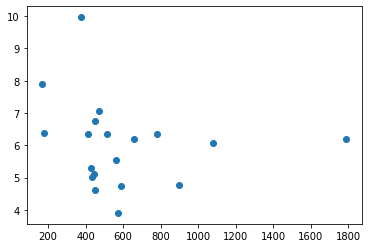

In [13]:
plt.scatter(df3['illness'],df3['Tau'])
# plt.ylim(0,20)
hold_df = df3.dropna(subset=('illness','Tau'))
corr=stats.pearsonr(hold_df['illness'],hold_df['Tau'])
print(corr[0],corr[1])
plt.show()

-0.0643652720924663 0.7934866674092156


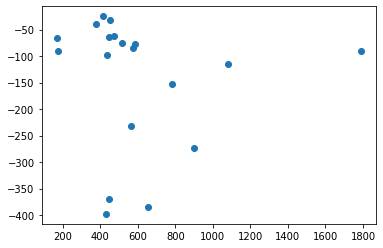

In [125]:
plt.scatter(df3['illness'],df3['Variation'])
# plt.ylim(0,20)
hold_df = df3.dropna(subset=('illness','Variation'))
corr=stats.pearsonr(hold_df['illness'],hold_df['Variation'])
print(corr[0],corr[1])
plt.show()

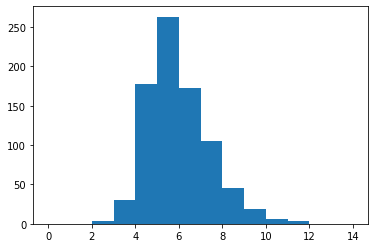

In [126]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(df2['Tau'],bins=bins)
plt.show()

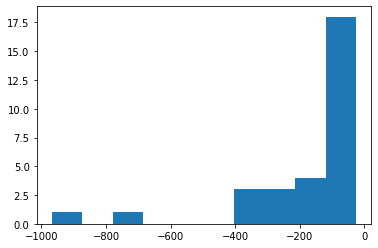

In [134]:
plt.hist(df3['Variation'])
plt.show()

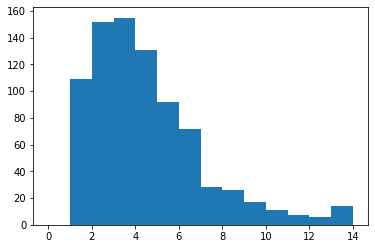

In [127]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(df2['First Doubling'],bins=bins)
plt.show()

0.1721670155713451


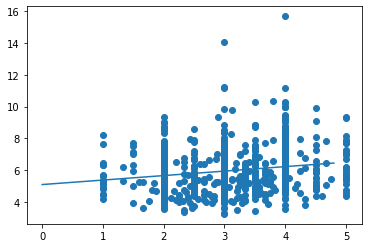

In [128]:
plt.scatter(df2['Average Rating'],df2['Tau'])
# plt.ylim(4,10)
hold_df = df2.dropna(subset=('Average Rating','Tau'))
corr=stats.pearsonr(hold_df['Average Rating'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['Average Rating'],hold_df['Tau'])
xval = np.arange(0,5,0.2)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

-0.22354342044097242
-0.0003657836566715967


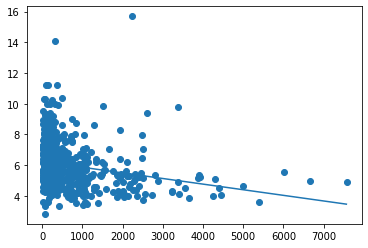

In [129]:
plt.scatter(df2['County Beds'],df2['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = df2.dropna(subset=('County Beds','Tau'))
corr=stats.pearsonr(hold_df['County Beds'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['County Beds'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['County Beds']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

0.2939949222320094


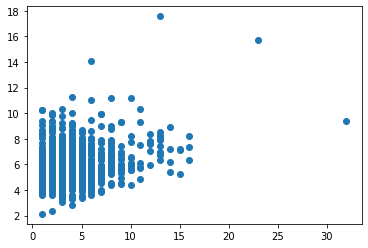

In [130]:
plt.scatter(df2['First Doubling'],df2['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,10)
hold_df = df2.dropna(subset=('First Doubling','Tau'))
corr=stats.pearsonr(hold_df['First Doubling'],hold_df['Tau'])
print(corr[0])
plt.show()

0.034677840808136434
0.20931929827573562


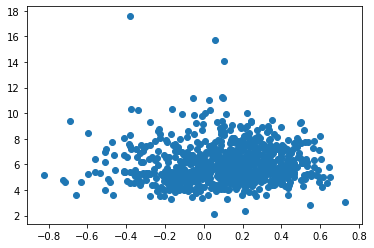

In [131]:
plt.scatter(df2['R/D Spectrum'],df2['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = df2.dropna(subset=('R/D Spectrum','Tau'))
corr=stats.pearsonr(hold_df['R/D Spectrum'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['R/D Spectrum'],hold_df['Tau'])
print(slope)
xval = np.arange(min(hold_df['R/D Spectrum']),max(hold_df['R/D Spectrum']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()